In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler

In [4]:
data=pd.read_csv(r".\ed_train.csv")

In [5]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,NO,2.2,NO,1,NO,7,0.6,188.0,2,...,20.0,756.0,2549.0,9,7,19,0,0,1,1
1,1021,yes,0.5,yes,0,yes,53,0.7,136.0,3,...,905.0,1988.0,2631.0,17,3,7,1,1,0,2
2,563,yes,0.5,yes,2,yes,41,0.9,145.0,5,...,1263.0,1716.0,2603.0,11,2,9,1,1,0,2
3,615,yes,2.5,NO,0,NO,10,0.8,131.0,6,...,1216.0,1786.0,2769.0,16,8,11,1,0,0,2
4,1821,yes,1.2,NO,13,yes,44,0.6,141.0,2,...,1208.0,1212.0,1411.0,8,2,15,1,1,0,1


In [6]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1992 non-null   int64  
 1   blue           1992 non-null   object 
 2   clock_speed    1992 non-null   float64
 3   dual_sim       1992 non-null   object 
 4   fc             1992 non-null   int64  
 5   four_g         1992 non-null   object 
 6   int_memory     1992 non-null   int64  
 7   m_dep          1992 non-null   float64
 8   mobile_wt      1989 non-null   float64
 9   n_cores        1992 non-null   int64  
 10  pc             1992 non-null   int64  
 11  px_height      1991 non-null   float64
 12  px_width       1989 non-null   float64
 13  ram            1989 non-null   float64
 14  sc_h           1992 non-null   int64  
 15  sc_w           1992 non-null   int64  
 16  talk_time      1992 non-null   int64  
 17  three_g        1992 non-null   int64  
 18  touch_sc

In [9]:
data[['blue','dual_sim','four_g','three_g','touch_screen','wifi']]=data[['blue','dual_sim','four_g','three_g','touch_screen','wifi']].astype(object)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1992 non-null   int64  
 1   blue           1992 non-null   object 
 2   clock_speed    1992 non-null   float64
 3   dual_sim       1992 non-null   object 
 4   fc             1992 non-null   int64  
 5   four_g         1992 non-null   object 
 6   int_memory     1992 non-null   int64  
 7   m_dep          1992 non-null   float64
 8   mobile_wt      1989 non-null   float64
 9   n_cores        1992 non-null   int64  
 10  pc             1992 non-null   int64  
 11  px_height      1991 non-null   float64
 12  px_width       1989 non-null   float64
 13  ram            1989 non-null   float64
 14  sc_h           1992 non-null   int64  
 15  sc_w           1992 non-null   int64  
 16  talk_time      1992 non-null   int64  
 17  three_g        1992 non-null   object 
 18  touch_sc

In [9]:
(data.isna().mean()*100)

battery_power    0.000000
blue             0.000000
clock_speed      0.000000
dual_sim         0.000000
fc               0.000000
four_g           0.000000
int_memory       0.000000
m_dep            0.000000
mobile_wt        0.150602
n_cores          0.000000
pc               0.000000
px_height        0.050201
px_width         0.150602
ram              0.150602
sc_h             0.000000
sc_w             0.000000
talk_time        0.000000
three_g          0.000000
touch_screen     0.000000
wifi             0.000000
price_range      0.000000
dtype: float64

<AxesSubplot:>

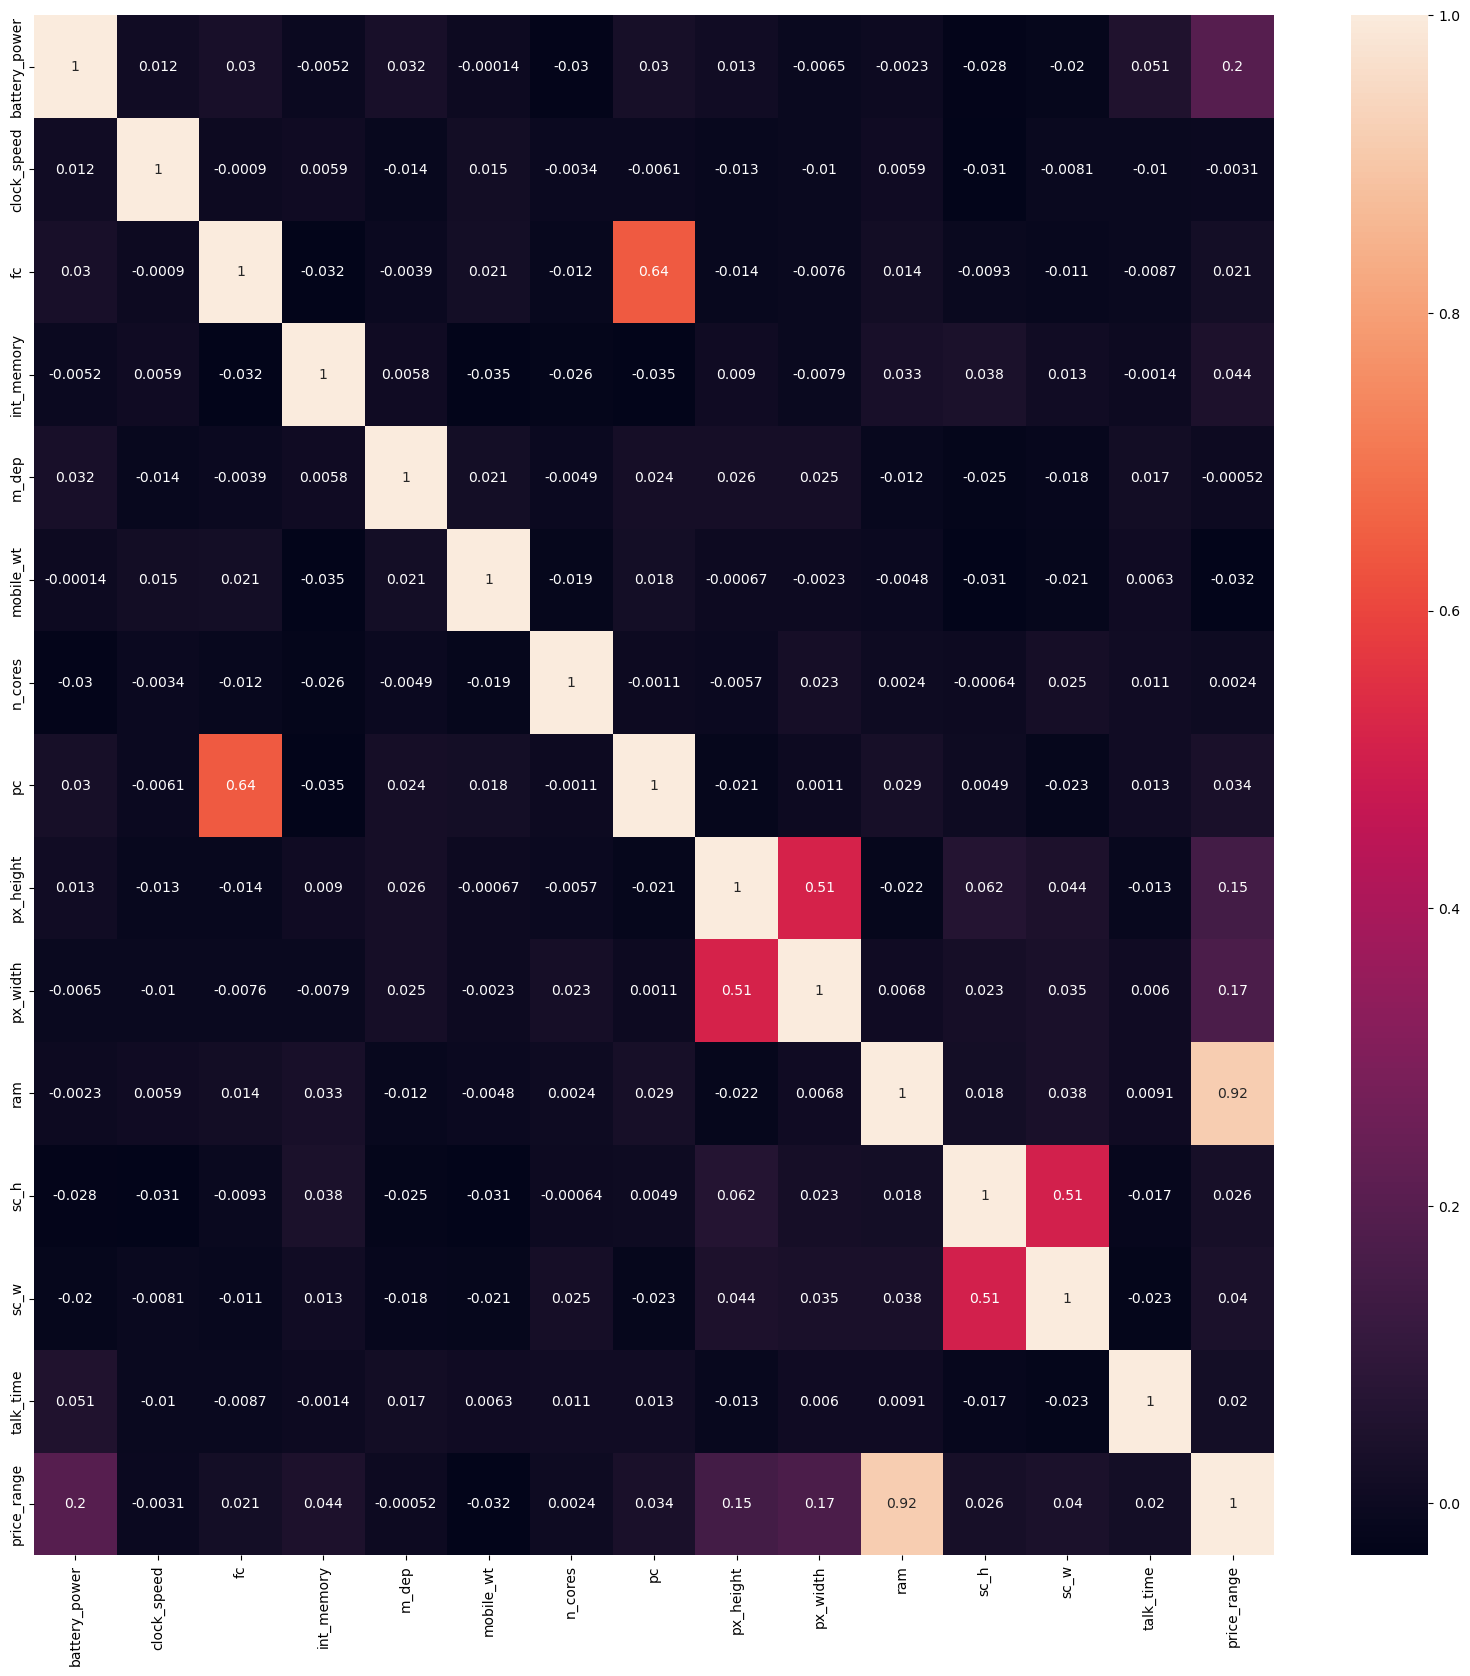

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [13]:
f_v=data[data.columns[:-1]]
c_l=data[[data.columns[-1]]]

In [15]:
c_l.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [14]:
f_v.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,NO,2.2,NO,1,NO,7,0.6,188.0,2,2,20.0,756.0,2549.0,9,7,19,0,0,1
1,1021,yes,0.5,yes,0,yes,53,0.7,136.0,3,6,905.0,1988.0,2631.0,17,3,7,1,1,0
2,563,yes,0.5,yes,2,yes,41,0.9,145.0,5,6,1263.0,1716.0,2603.0,11,2,9,1,1,0
3,615,yes,2.5,NO,0,NO,10,0.8,131.0,6,9,1216.0,1786.0,2769.0,16,8,11,1,0,0
4,1821,yes,1.2,NO,13,yes,44,0.6,141.0,2,14,1208.0,1212.0,1411.0,8,2,15,1,1,0


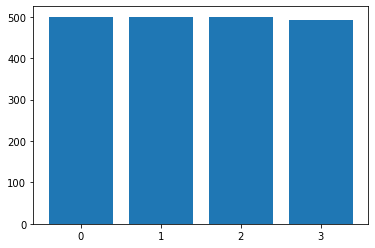

In [12]:
plt.bar(c_l["price_range"].unique(),c_l.value_counts().values)
plt.xticks(c_l["price_range"].unique())
plt.show()

In [13]:
c_l.value_counts()

price_range
0              500
1              500
2              500
3              492
dtype: int64

<AxesSubplot:>

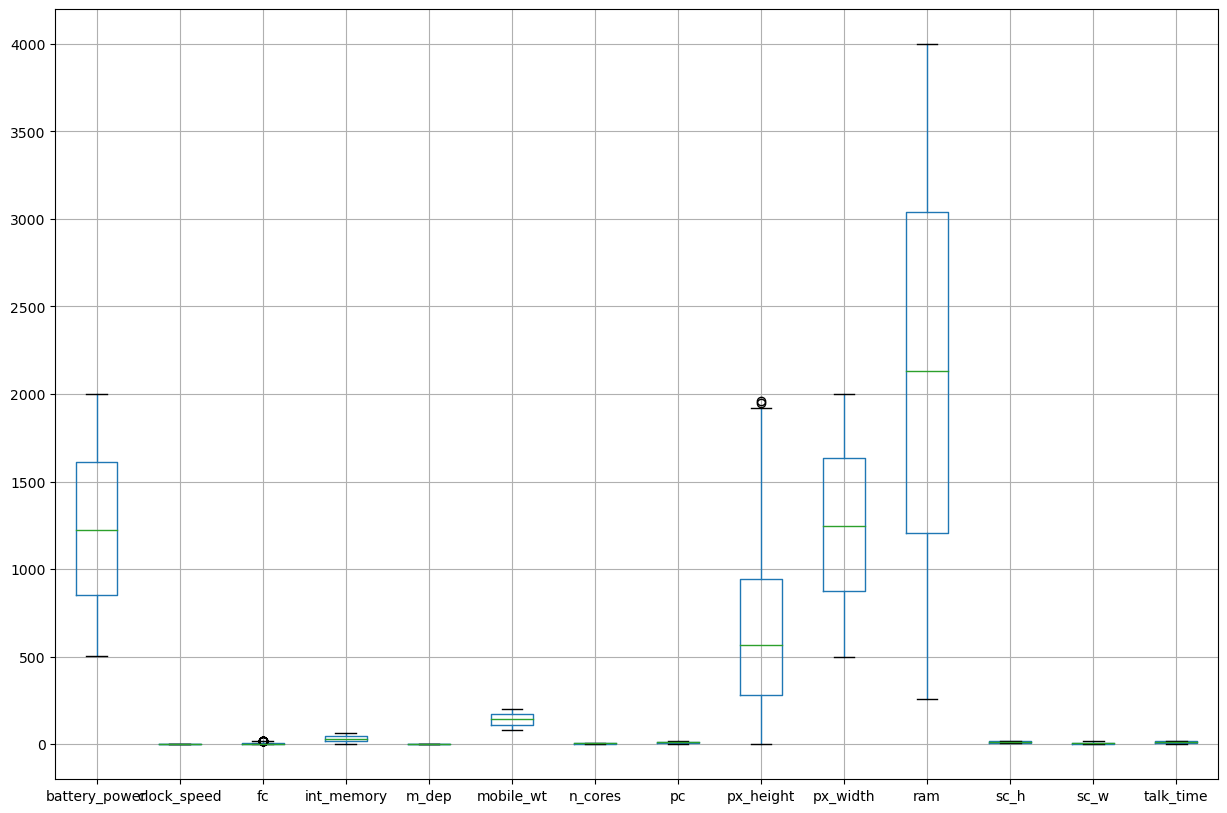

In [22]:
c=[]
l=[]
for y in f_v.columns:
    if f_v[y].dtype!="O":
        c.append(y)
    else:
        l.append(y)
plt.figure(figsize=(15,10))
f_v[c].boxplot()

In [41]:
x_train,x_test,y_train,y_test=train_test_split(f_v,c_l,train_size=0.8,stratify=c_l,random_state=1)

In [42]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
883,1829,NO,1.7,NO,0,NO,36,0.8,112.0,5,1,291.0,563.0,1475.0,11,4,7,0,0,0
260,1722,NO,2.6,NO,8,NO,18,0.8,177.0,2,16,865.0,1741.0,3271.0,14,0,15,1,0,1
463,765,NO,2.9,NO,0,yes,18,0.1,153.0,7,0,6.0,793.0,1066.0,11,1,16,1,1,0
1277,1724,yes,1.8,NO,0,yes,9,0.8,100.0,2,1,655.0,828.0,3056.0,18,16,6,1,0,0
910,904,NO,1.8,NO,3,yes,35,0.4,168.0,3,4,42.0,507.0,1360.0,15,12,11,1,0,0


In [18]:
x_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        3
n_cores          0
pc               0
px_height        1
px_width         2
ram              2
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [43]:
ohe=OneHotEncoder()

In [44]:
x_train=x_train.reset_index(drop=True)

In [45]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1829,NO,1.7,NO,0,NO,36,0.8,112.0,5,1,291.0,563.0,1475.0,11,4,7,0,0,0
1,1722,NO,2.6,NO,8,NO,18,0.8,177.0,2,16,865.0,1741.0,3271.0,14,0,15,1,0,1
2,765,NO,2.9,NO,0,yes,18,0.1,153.0,7,0,6.0,793.0,1066.0,11,1,16,1,1,0
3,1724,yes,1.8,NO,0,yes,9,0.8,100.0,2,1,655.0,828.0,3056.0,18,16,6,1,0,0
4,904,NO,1.8,NO,3,yes,35,0.4,168.0,3,4,42.0,507.0,1360.0,15,12,11,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,1330,NO,0.9,NO,6,yes,52,0.8,84.0,4,12,462.0,1304.0,3269.0,19,6,8,1,1,0
1589,1476,yes,1.2,yes,0,yes,55,0.1,171.0,4,5,1641.0,1666.0,1529.0,13,8,3,1,0,1
1590,688,yes,2.5,NO,9,NO,40,0.2,109.0,5,20,376.0,1957.0,1382.0,12,7,8,0,1,0
1591,1009,yes,2.8,yes,7,yes,2,0.6,115.0,7,15,267.0,1841.0,2286.0,19,8,13,1,0,0


In [51]:
ohe.get_feature_names().tolist()

['x0_NO',
 'x0_yes',
 'x1_NO',
 'x1_yes',
 'x2_NO',
 'x2_yes',
 'x3_0',
 'x3_1',
 'x4_0',
 'x4_1',
 'x5_0',
 'x5_1']

In [52]:
x_train[ohe.get_feature_names().tolist()]=pd.DataFrame(ohe.fit_transform(x_train[l]).toarray()).applymap(int)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [57]:
x_train.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,x1_NO,x1_yes,x2_NO,x2_yes,x3_0,x3_1,x4_0,x4_1,x5_0,x5_1
0,1829,1.7,0,36,0.8,112.0,5,1,291.0,563.0,...,1,0,1,0,1,0,1,0,1,0
1,1722,2.6,8,18,0.8,177.0,2,16,865.0,1741.0,...,1,0,1,0,0,1,1,0,0,1
2,765,2.9,0,18,0.1,153.0,7,0,6.0,793.0,...,1,0,0,1,0,1,0,1,1,0
3,1724,1.8,0,9,0.8,100.0,2,1,655.0,828.0,...,1,0,0,1,0,1,1,0,1,0
4,904,1.8,3,35,0.4,168.0,3,4,42.0,507.0,...,1,0,0,1,0,1,1,0,1,0


In [23]:
y_train.value_counts()/len(y_train)

price_range
0              0.251099
1              0.251099
2              0.251099
3              0.246704
dtype: float64

In [24]:
c_l.value_counts()/len(c_l)

price_range
0              0.251004
1              0.251004
2              0.251004
3              0.246988
dtype: float64

In [25]:
x_train.isnull().sum()>0

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt         True
n_cores          False
pc               False
px_height         True
px_width          True
ram               True
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
x0_NO            False
x0_yes           False
x1_NO            False
x1_yes           False
x2_NO            False
x2_yes           False
x3_0             False
x3_1             False
x4_0             False
x4_1             False
x5_0             False
x5_1             False
dtype: bool

In [54]:
x_train.drop(l,axis=1,inplace=True)

In [55]:
x_train_c=x_train.copy()

In [56]:
x_train.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,x1_NO,x1_yes,x2_NO,x2_yes,x3_0,x3_1,x4_0,x4_1,x5_0,x5_1
0,1829,1.7,0,36,0.8,112.0,5,1,291.0,563.0,...,1,0,1,0,1,0,1,0,1,0
1,1722,2.6,8,18,0.8,177.0,2,16,865.0,1741.0,...,1,0,1,0,0,1,1,0,0,1
2,765,2.9,0,18,0.1,153.0,7,0,6.0,793.0,...,1,0,0,1,0,1,0,1,1,0
3,1724,1.8,0,9,0.8,100.0,2,1,655.0,828.0,...,1,0,0,1,0,1,1,0,1,0
4,904,1.8,3,35,0.4,168.0,3,4,42.0,507.0,...,1,0,0,1,0,1,1,0,1,0


In [61]:
si=SimpleImputer()

In [62]:
t_d=pd.DataFrame(si.fit_transform(x_train_c),columns=x_train.columns)

In [63]:
t_d

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,x1_NO,x1_yes,x2_NO,x2_yes,x3_0,x3_1,x4_0,x4_1,x5_0,x5_1
0,1829.0,1.7,0.0,36.0,0.8,112.0,5.0,1.0,291.0,563.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1722.0,2.6,8.0,18.0,0.8,177.0,2.0,16.0,865.0,1741.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,765.0,2.9,0.0,18.0,0.1,153.0,7.0,0.0,6.0,793.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1724.0,1.8,0.0,9.0,0.8,100.0,2.0,1.0,655.0,828.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,904.0,1.8,3.0,35.0,0.4,168.0,3.0,4.0,42.0,507.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,1330.0,0.9,6.0,52.0,0.8,84.0,4.0,12.0,462.0,1304.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1589,1476.0,1.2,0.0,55.0,0.1,171.0,4.0,5.0,1641.0,1666.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1590,688.0,2.5,9.0,40.0,0.2,109.0,5.0,20.0,376.0,1957.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1591,1009.0,2.8,7.0,2.0,0.6,115.0,7.0,15.0,267.0,1841.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


C:\Users\saxon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saxon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mobile_wt', ylabel='Density'>

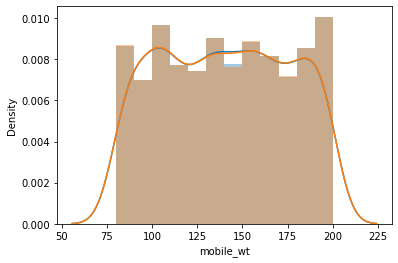

In [32]:
sns.distplot(t_d["mobile_wt"])
sns.distplot(x_train["mobile_wt"])

C:\Users\saxon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saxon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='px_height', ylabel='Density'>

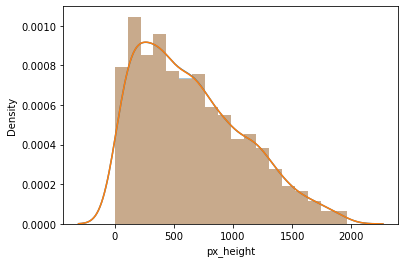

In [33]:
sns.distplot(t_d["px_height"])
sns.distplot(x_train["px_height"])

C:\Users\saxon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saxon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='px_width', ylabel='Density'>

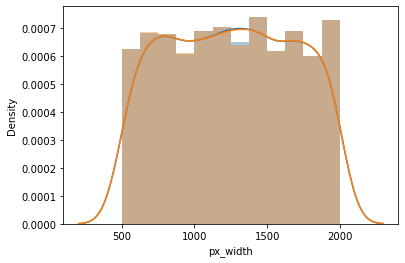

In [34]:

sns.distplot(t_d["px_width"])
sns.distplot(x_train["px_width"])

In [58]:
y_train.reset_index(inplace=True,drop=True)

In [64]:
ros=RandomOverSampler(sampling_strategy={0:500,1:500,2:500,3:500})

In [65]:
x,y=ros.fit_resample(t_d,y_train)# t_d = x_train

C:\Users\LENOVO\anaconda3\lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (500) in class 0 will be larger than the number of samples in the majority class (class #0 -> 400)
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (500) in class 1 will be larger than the number of samples in the majority class (class #0 -> 400)
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (500) in class 2 will be larger than the number of samples in the majority class (class #0 -> 400)
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (500) in class 3 will be larger than the number of samples in the majority class (class #0 -> 400)
  warnings.wa

In [66]:
x_train=pd.DataFrame(x)

In [67]:
y_train=pd.DataFrame(y)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [71]:
x_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1624,NO,1.6,yes,8,NO,28,0.4,150.0,2,10,689.0,699.0,2473.0,16,11,2,1,0,0
1,1330,NO,1.1,NO,11,NO,37,0.7,126.0,7,20,1103.0,1637.0,2166.0,10,1,4,1,0,0
2,1880,yes,1.8,NO,4,yes,18,0.7,138.0,3,5,71.0,699.0,3333.0,17,15,7,1,0,0
3,1008,NO,2.5,NO,3,NO,36,1.0,109.0,1,14,825.0,1972.0,1083.0,6,4,6,0,0,0
4,1317,NO,1.5,NO,6,NO,12,0.1,154.0,2,9,431.0,542.0,425.0,7,0,11,1,1,1


In [69]:
knn=KNeighborsClassifier(n_neighbors=5)
model=knn.fit(x_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [70]:
x_test.reset_index(inplace=True,drop=True)

In [72]:
x_test[ohe.get_feature_names().tolist()]=pd.DataFrame(ohe.transform(x_test[l]).toarray()).applymap(int)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [73]:
x_test.drop(l,axis=1,inplace=True)

In [74]:
x_test=si.transform(x_test)

In [75]:
predicted=model.predict(x_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(y_test,predicted)

0.9273182957393483

In [78]:
gnb=GaussianNB()

In [79]:
gmodel=gnb.fit(x_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
predictedg=gmodel.predict(x_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [81]:
accuracy_score(y_test,predictedg)

0.7969924812030075

In [90]:
t=pd.read_csv(r"C:\Users\LENOVO\Desktop\ml\1\test.csv")

In [91]:
t.drop("id",axis=1,inplace=True)

##### t.head()

In [93]:
t[l].iloc[0]

blue            yes
dual_sim        yes
four_g          yes
three_g           0
touch_screen      1
wifi              0
Name: 0, dtype: object

In [94]:
ohe.transform(pd.DataFrame(t[l].iloc[0].values).T).toarray()

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.]])

In [95]:
import joblib
  

joblib.dump(gmodel,"final.joblib")


['final.joblib']

In [533]:
q=joblib.load("final.joblib")

In [541]:
q.predict(x_test[[0]])

C:\Users\saxon\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int64)